# Testing different finite difference approximations for time independent Schrodinger equation

Using harmonic oscillator for testing

In [1]:
from numba import njit # compile python
from scipy.sparse import linalg # Linear algebra for sparse matrix
import matplotlib.pyplot as plt # plotting facility
import numpy as np

## Backward finite difference 

In [2]:
from backward_diff_qhamiltonian import BackwardDiffQHamiltonian

for omega in [4., 8.]:
    # Find energies of a harmonic oscillator V = 0.5*(omega*x)**2
    
    @njit
    def v(x):
        return 0.5 * (omega * x) **2
    
    harmonic_osc = BackwardDiffQHamiltonian(
                        x_grid_dim=512,
                        x_amplitude=5.,
                        v=v,
                    )
    # get energies as eigenvalues
    energies, _ = linalg.eigs(harmonic_osc.hamiltonian, k=20)

    # sort eigenvalues by real part
    energies = energies[np.argsort(energies.real)]

    print("\n\nFirst energies for harmonic oscillator with omega = {}".format(omega))
    print(energies)



First energies for harmonic oscillator with omega = 4.0
[-4790.03846548+190.23805493j -4790.03846548-190.23805493j
 -4789.13338313+253.1690532j  -4789.13338313-253.1690532j
 -4788.81295968+127.42199467j -4788.81295968-127.42199467j
 -4786.02520775+316.31580523j -4786.02520775-316.31580523j
 -4785.83236883 -64.38788545j -4785.83236883 +64.38788545j
 -4780.49622497+379.49488623j -4780.49622497-379.49488623j
 -4772.49009503+442.16620736j -4772.49009503-442.16620736j
 -4762.40466138+503.73382331j -4762.40466138-503.73382331j
 -4751.02268336+564.06679309j -4751.02268336-564.06679309j
 -4738.77855827+623.73310517j -4738.77855827-623.73310517j]


First energies for harmonic oscillator with omega = 8.0
[-4635.90442798 +35.1959641j  -4635.90442798 -35.1959641j
 -4632.28892447+104.56452179j -4632.28892447-104.56452179j
 -4626.82685457+171.68098517j -4626.82685457-171.68098517j
 -4621.32860398+237.89412767j -4621.32860398-237.89412767j
 -4614.91700473-304.80904792j -4614.91700473+304.80904792j


## Forward finite difference

In [3]:
from forward_diff_qhamiltonian import ForwardDiffQHamiltonian

for omega in [4., 8.]:
    # Find energies of a harmonic oscillator V = 0.5*(omega*x)**2
    
    @njit
    def v(x):
        return 0.5 * (omega * x) **2
    
    harmonic_osc = ForwardDiffQHamiltonian(
                        x_grid_dim=512,
                        x_amplitude=5.,
                        v=v,
                    )
    # get energies as eigenvalues 
    energies, _ = linalg.eigs(harmonic_osc.hamiltonian, k=20)

    # sort eigenvalues by real part
    energies = energies[np.argsort(energies.real)]

    print("\n\nFirst energies for harmonic oscillator with omega = {}".format(omega))
    print(energies)



First energies for harmonic oscillator with omega = 4.0
[-4786.13278193  +0.j         -4785.32149211 -62.24192831j
 -4785.32149211 +62.24192831j -4782.70606526+124.81704252j
 -4782.70606526-124.81704252j -4777.94718754+187.81477277j
 -4777.94718754-187.81477277j -4770.90560353+251.18141951j
 -4770.90560353-251.18141951j -4761.99046209+314.87819439j
 -4761.99046209-314.87819439j -4752.51420859-378.41253824j
 -4752.51420859+378.41253824j -4743.65864528+440.42223146j
 -4743.65864528-440.42223146j -4735.20346892+500.65065789j
 -4735.20346892-500.65065789j -4726.37226229+560.00423926j
 -4726.37226229-560.00423926j -4716.4865435 +619.01681619j]


First energies for harmonic oscillator with omega = 8.0
[-4612.86895324 +32.50857007j -4612.86895324 -32.50857007j
 -4611.32636976 +98.53966109j -4611.32636976 -98.53966109j
 -4606.74426775+166.73363007j -4606.74426775-166.73363007j
 -4599.10078388+237.56175681j -4599.10078388-237.56175681j
 -4593.37693715-308.18628401j -4593.37693715+308.18628401

## Central finite difference



First energies for harmonic oscillator with omega = 4.0
[ 1.9998  5.999   9.9975 13.9952 17.9921 21.9883 25.9837 29.9783 33.9722
 37.9653 41.9576 45.9492 49.94   53.93   57.9193 61.9078 65.8955 69.8824
 73.8686 77.854 ]


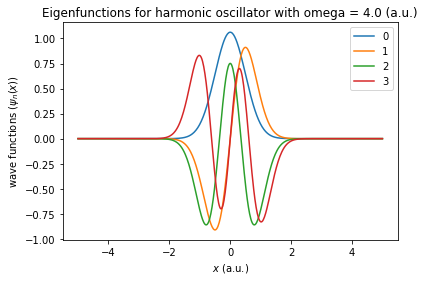



First energies for harmonic oscillator with omega = 8.0
[  3.9992  11.9962  19.99    27.9808  35.9686  43.9532  51.9348  59.9133
  67.8888  75.8611  83.8304  91.7966  99.7597 107.7197 115.6766 123.6305
 131.5812 139.5289 147.4735 155.4149]


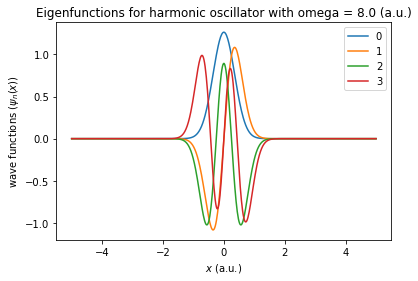

In [4]:
from central_diff_qhamiltonian import CentralDiffQHamiltonian

for omega in [4., 8.]:
    # Find energies of a harmonic oscillator V = 0.5*(omega*x)**2
    
    @njit
    def v(x):
        return 0.5 * (omega * x) **2
    
    harmonic_osc = CentralDiffQHamiltonian(
                        x_grid_dim=512,
                        x_amplitude=5.,
                        v=v,
                    )

    # plot eigenfunctions
    for n in range(4):
        plt.plot(harmonic_osc.x, harmonic_osc.get_eigenstate(n), label=str(n))

    print("\n\nFirst energies for harmonic oscillator with omega = {}".format(omega))

    # set precision for printing arrays
    np.set_printoptions(precision=4)
    print(harmonic_osc.energies)

    plt.title("Eigenfunctions for harmonic oscillator with omega = {} (a.u.)".format(omega))
    plt.xlabel('$x$ (a.u.)')
    plt.ylabel('wave functions ($\\psi_n(x)$)')
    plt.legend()
    plt.show()